# Land Cover Classification


## Part 3: Change Analysis

<hr style="border:1px solid gray"> </hr>

## Introduction

A Land Cover map can be used to map the various types of land cover (streams, built-up) and also the forest cover (evergreen forest, mixed forest and invasive plant species). There are three invasive plant species seen within Betampona Nature Reserve (BNR): Madagascar Cardamom, Molucca Raspberry and Strawberry Guava

BNR is located in northeastern Madagascar and was designated a strict Nature Reserve in 1927.

The table below lists the land cover classes along with the detailed descriptions

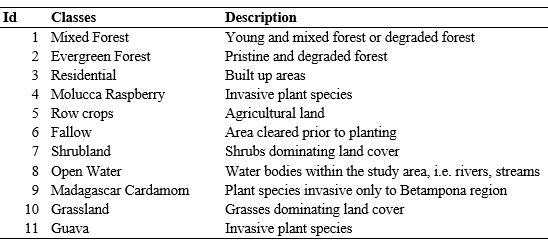

A Land Cover map can be created through various classification methods. In these labs, we have focused on pixel-based methods (classification of each pixel in the image) like Support Vector Machine (SVM), Random Forest (RF), Deep Neural Networks (DNN), and CNN-based networks (Convolutional Neural Network) including ResNet and U-Net. We have created a classification map for 2019 and we have an existing 2010 classification map. 

In this lab we will calculate change as detailed in Ghulam et al. (2015) which is a grid cell based approach. We will use grid cells of size 10m, 30m and 100m. 

Overview: Once the fishnet grid is created, it has to be intersected with the Land Cover Classification maps. Then, to group together two polygons of the same class within the same fishnet cell, the land cover area is summed for each unique land cover within a fishnet cell using ‘Summarize Attributes’. This results in a table with multiple rows for the various land covers and fishnet cells. To get this land cover information as attributes of a fishnet cell (in columns instead of rows), the table is ‘pivoted’ such that for each fishnet cell, there is land cover area as the attribute for each land cover class. Finally, percent percent change is computed from 2010 to 2019

### 0.<b>Create Fishnets</b>: 
To create the grids, we will use "create fishnet" tool in ArcGIS Pro. 

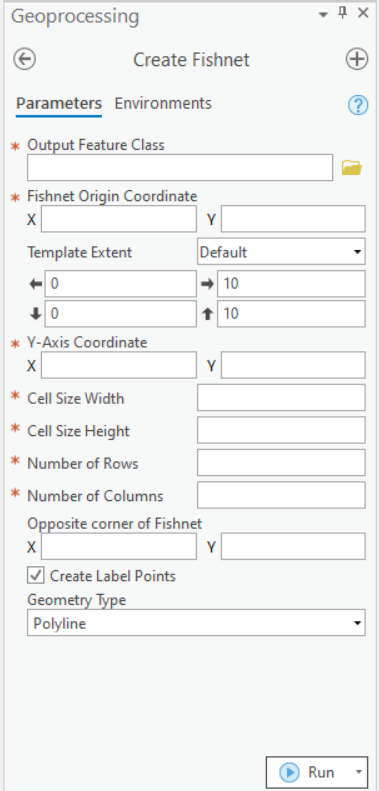

1. Set an output feature class. 
2. Select the 2010 classified map as the template extent, since the 2019 extent is bigger than the 2010 extent
3. Specify <b>10</b> as the cell size width and height.
4. Select <b>polygon</b> as the geometry type
5. <b>Repeat</b> for cell size 30 and 100

### 1. <b>Classification to vector</b>

This is needed to convert the raster classified data to a form that can be analyzed. We will create vector files using the <b>classification to vector</b> tool within ENVI

- Create shapefiles for 2010 and 2019 and save them within appropriate folders
- Export all classes in a single vector layer


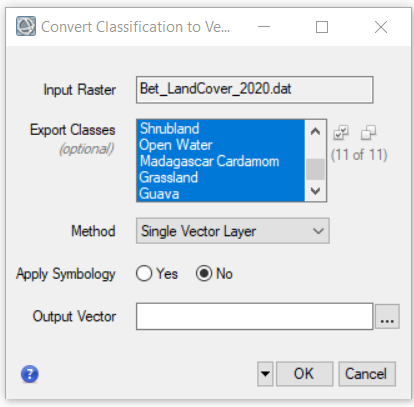

### 2. <b>Intersection</b>

In order to compare the classification vector files to the fishnet grid (most polygons were larger than the grid), an intersection between the two vector layers must be performed. 

This can be done through the "Intersect" tool of ArcGIS

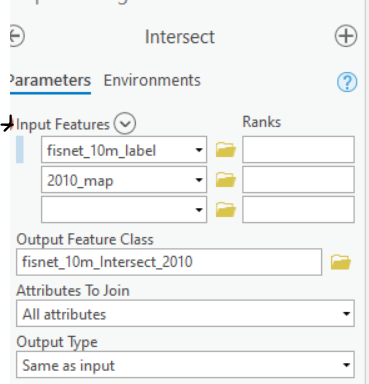

- Select the input features (fishnet grid & vector form of classification map)
- Give an appropriate output name
- Join all attributes
- Calculate area in percent of grid cell (divide the Shape area by 100m2, 900m2 or 10000m2)
- Repeat for both years (2010 and 2019) and for all grid sizes (10m, 30m and 100m)

### 3. <b>Summarize Attributes</b>

Same classes within the same grid cell is summed through this step. This is done using "Summarize Attributes" tool of ArcGIS

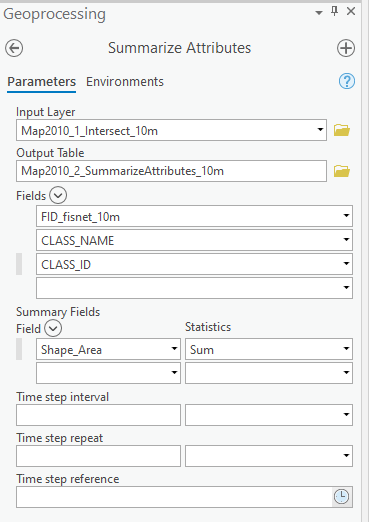

- select input layer
- Set output table
- Include fields: fishnet ID, class name and class value
- Summarize the percent area field
- Repeat for both years (2010 and 2019) and for all grid sizes (10m, 30m, and 100m)

### 4. <b>Pivot Table</b>

The tables created in the previous step contain 'class names' and 'class values' as rows within the table (see image). 

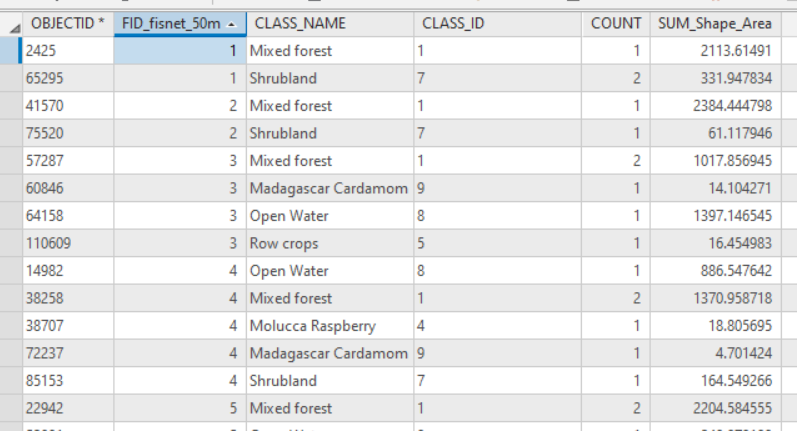

We will use "Pivot Table" so that class names and class values are attributes for each fishnet / grid 

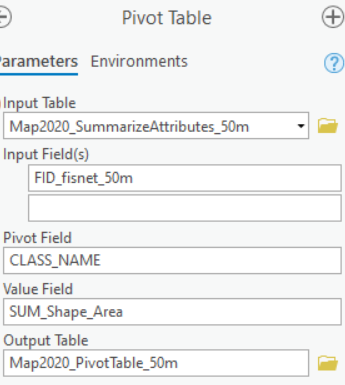

- Select <b>FID_fishnet</b> as the input field 
- Pivot table based on <b> class name</b> field
- Values of the pivoted table will be based on <b> sum Shape_area</b>
- Repeat for both years (2010 and 2019) and for all grid sizes (10m, 30m and 100m)

### 5. <b>Calculate Change</b>

Once all the previous tables are created, we can calculate change over time

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
# import dbf files 
df_2019= gpd.read_file('./2019_land_cover.dbf') # change file dir + file name
df_2010= gpd.read_file('./2010_land_cover.dbf') # change file dir + file name

In [ ]:
!pip install -U pip
!pip install GDAL-1.11.2-cp27-none-win32.whl
!pip install rasterio-0.24.0-cp27-none-win32.whl

In [ ]:
import rasterio

In [ ]:
df_2019

In [ ]:
# drop any un-needed columns
#df_2019= data.drop(['class_2020', 'AREA', 'geometry', 'Shape_Leng', 'FID_Map202'],axis=1)
df_2019

In [ ]:
# Column names 

print(df_2010.columns)
print(df_2019.columns)

In [ ]:
# calculate change 
df_change=pd.DataFrame()

df_change['fishnetid']=df_2019['FID_fisnet'] # calculate change based on common fishnet ID

df_2019 = df_2019.set_index(['FID_fisnet'])
df_2010 = df_2010.set_index(['FID_fisnet'])

df_change = df_change.set_index(['fishnetid'])

# make sure the column names are according to the results of the previous code block
df_change['shrubland']=df_2019['Shrubland']-df_2010['Shrubland'] 
df_change['rubus']=df_2019['Molucca_Ra']-df_2010['Molucca_Ra']
df_change['cardamom']=df_2019['Madagascar']-df_2010['Madagascar']
#df_change['invasive']=df_change['rubus']+df_change['cardamom']+df_change['guava']
df_change['ag_change']=df_2019['agrciul']-df_2010['agrciul']
df_change['mixed_change']=df_2019['mixed']-df_2010['mixed']
df_change['evergreen_change']=df_2019['F2']-df_2010['Evergreen_']
df_change['resident_change']=df_2019['Class_3__t']-df_2010['Residentia']

In [ ]:
df_change

In [ ]:
# Save results
df_change.to_csv('./change_analysis.csv') # change base dir + file name 

Once change has been calculated, this output table needs to be joined with the fishnet layer. 

Visualize the change either in a vector form, or in a raster form (“Feature to Raster” tool). 


Ghulam, A., Ghulam, O., Maimaitijiang, M., Freeman, K., Porton, I., & Maimaitiyiming, M. (2015). Remote Sensing Based Spatial Statistics to Document Tropical Rainforest Transition Pathways. Remote Sensing, 7(5), 6257-6279. doi:10.3390/rs70506257